In [29]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [30]:
#mnist for directly loading the data from keras

dataset = tf.keras.datasets.mnist
# this has labelled data, we are going to split it into, training and testing data
# thankfully this is already implemeted in keras, hence here is what we are going to do
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [31]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3)
model.save("handwritten_number_detection.model")

Epoch 1/3


2023-03-08 23:59:32.439847: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2568 - accuracy: 0.9242
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1047 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0713 - accuracy: 0.9774


INFO:tensorflow:Assets written to: handwritten_number_detection.model/assets


INFO:tensorflow:Assets written to: handwritten_number_detection.model/assets


In [33]:
model = tf.keras.models.load_model("handwritten_number_detection.model")
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0846 - accuracy: 0.9734


In [43]:
from IPython.display import Image

Image(filename='seven.png')

1
1/1 [==============================] - 0s 15ms/step
This digit is prolly 7


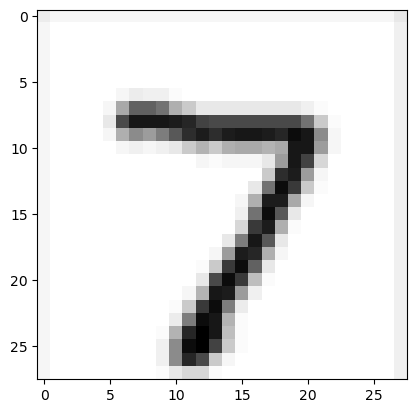

In [44]:
img = cv2.imread("seven.png")[:, :, 0]
img = np.array([img])
print(len(img))
prediction = model.predict(img)
print("This digit is prolly", np.argmax(prediction))
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()